In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from preprocess import get_results, mean_aggregate_results

flat_map = lambda f, xs: reduce(lambda a, b: a + b, map(f, xs), [])

In [49]:
ts = []
es = []

for i in range(9, 15):
	t, e = get_results(f'../results_final_{i}')
	ts.append(t)
	es.append(e)

In [50]:
def draw_consistency_comparison(framework, ts, es):
	ts = list(map(lambda df: df[df.framework == framework], ts))
	es = list(map(lambda df: df[df.framework == framework], es))

	models = flat_map(lambda m: [m] * 2, ts[0].model_name.unique())
	n_models = len(models) // 2

	
	fig, axes = plt.subplots(n_models, 2, constrained_layout=True)
	fig.set_size_inches(6, 2 * n_models)
	fig.suptitle(f'{framework} results consistency comparison')

	colors = []
	for idx, (model, ax) in enumerate(zip(models, axes.flatten())):
		if idx % 2 == 0:
			for t in ts:
				data = t[t.model_name == model]
				ax.plot(data.epoch, data.elapsed_time)
			colors = [l.get_color() for l in ax.lines]
		
		else:
			data = pd.concat(es)
			data = data[data.model_name == model]
			xs = range(data.shape[0])
			ax.bar(xs, data.elapsed_time, color=colors)

		ax.set_title(model)

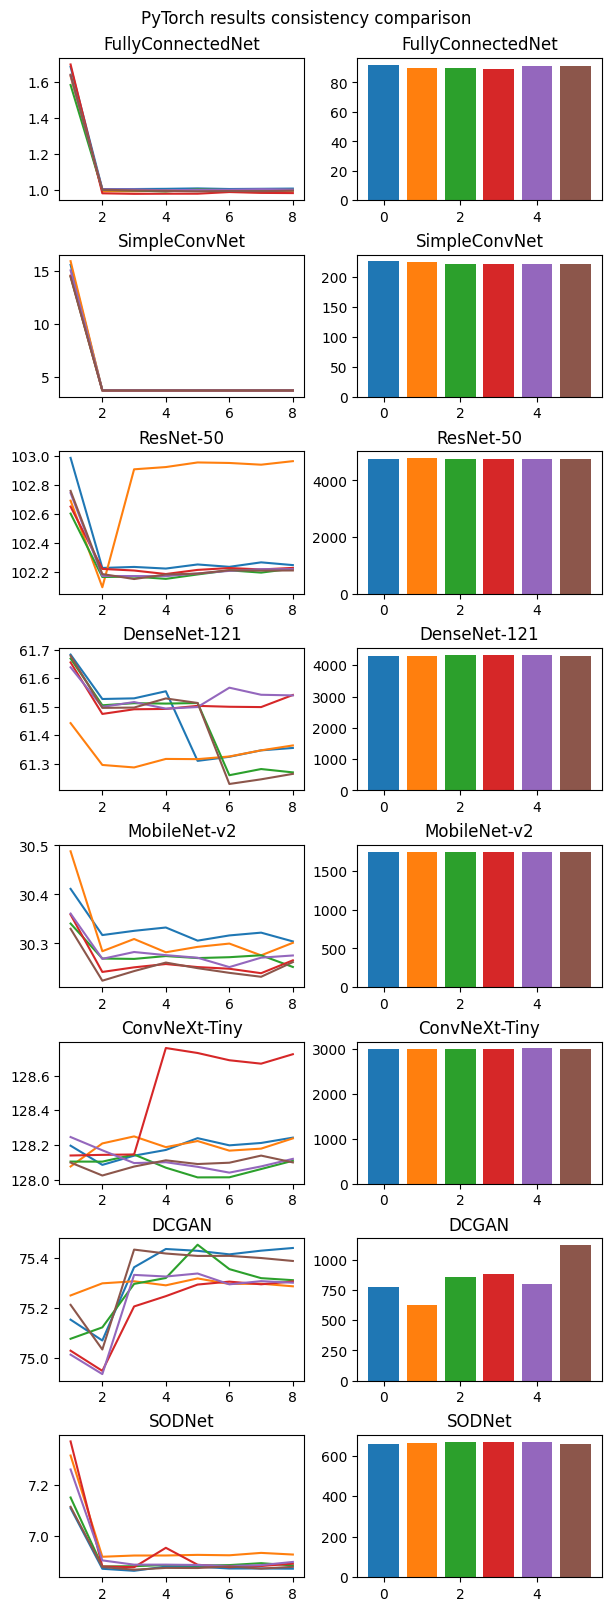

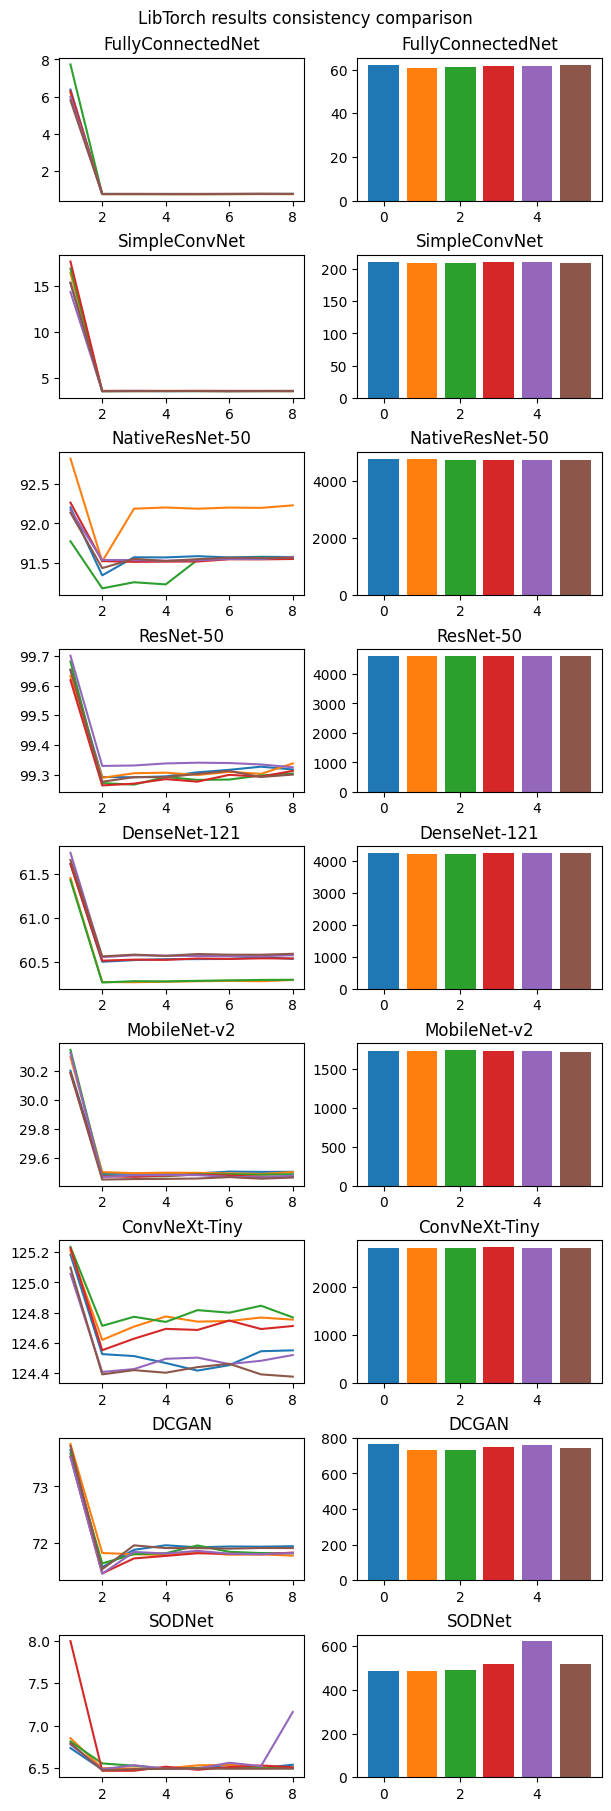

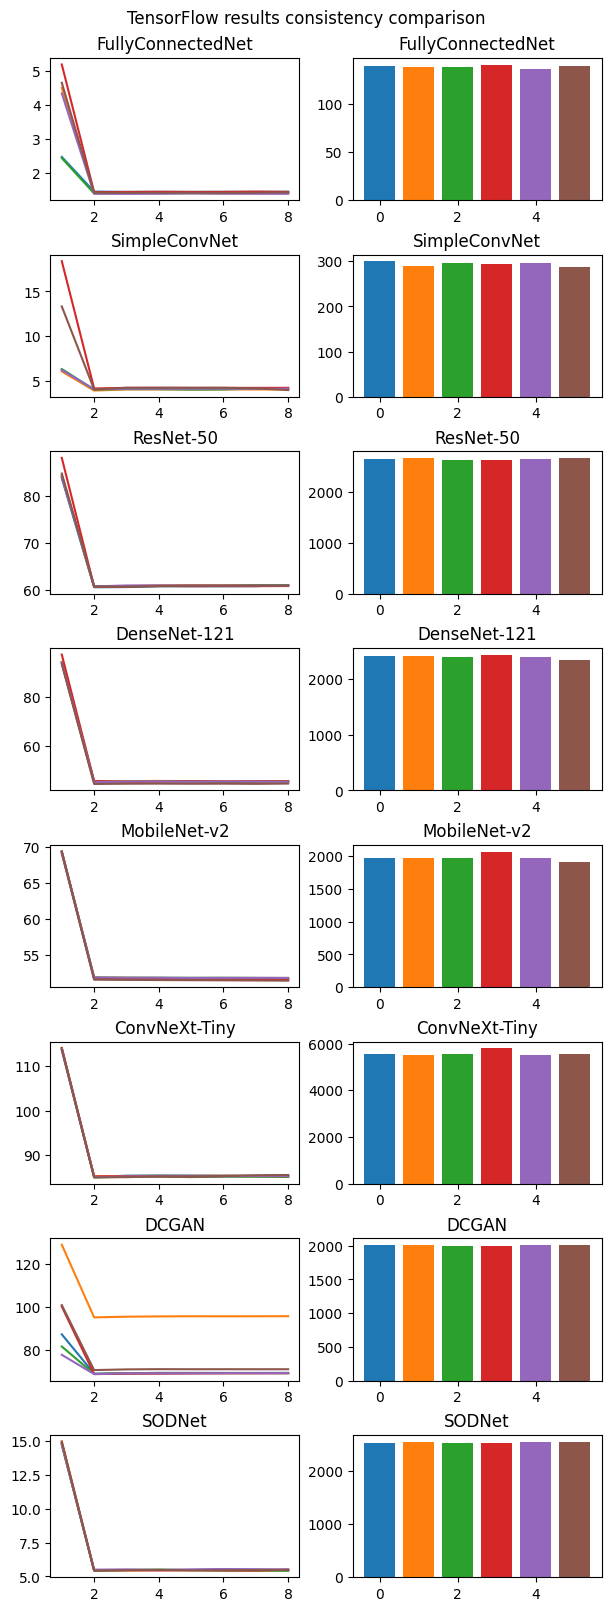

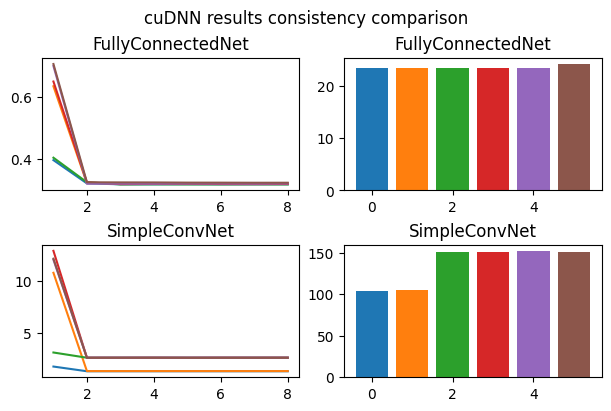

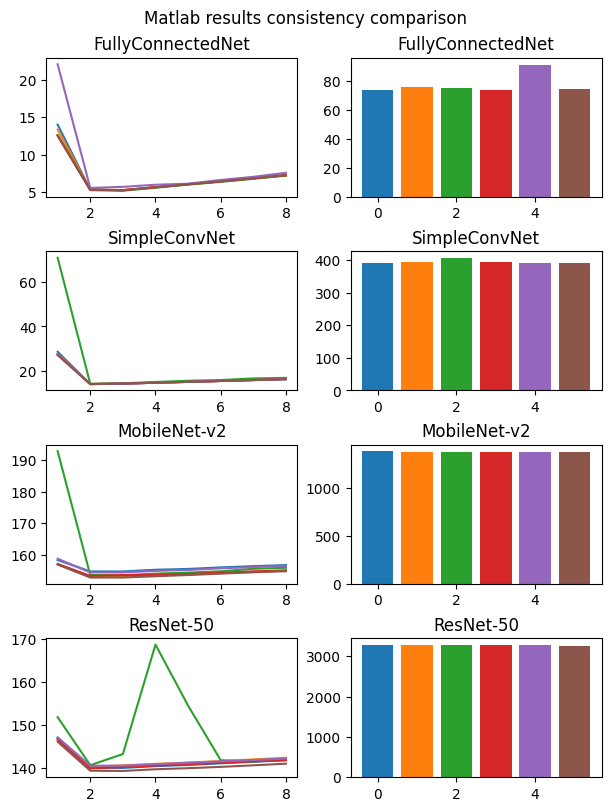

In [51]:
frameworks = ts[0].framework.unique()
for framework in frameworks:
	draw_consistency_comparison(framework, ts, es)

All benchmarks have near perfect consistency, thus there is no meaningful use in result aggregation. BUT I still do it for the CRAFT

In [52]:
tm, em = mean_aggregate_results(ts, es)

tm.head(10)

,framework,model_name,epoch,elapsed_time
0,PyTorch,FullyConnectedNet,1,1.645313
1,PyTorch,FullyConnectedNet,2,0.994969
2,PyTorch,FullyConnectedNet,3,0.993270
3,PyTorch,FullyConnectedNet,4,0.991930
4,PyTorch,FullyConnectedNet,5,0.994895
5,PyTorch,FullyConnectedNet,6,0.994037
6,PyTorch,FullyConnectedNet,7,0.993377
7,PyTorch,FullyConnectedNet,8,0.995062
8,PyTorch,SimpleConvNet,1,14.980530
9,PyTorch,SimpleConvNet,2,3.762469
